In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Netflix Dataset 1 (2).csv")

# Display first 5 rows
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [2]:
# Convert Release_Date to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract release year from Release_Date
df['Release_Year'] = df['Release_Date'].dt.year

# Check if conversion worked
df[['Release_Date', 'Release_Year']].head(10)


,Release_Date,Release_Year
0,2020-08-14,2020.0
1,2016-12-23,2016.0
2,2018-12-20,2018.0
3,2017-11-16,2017.0
4,2020-01-01,2020.0
5,2017-07-01,2017.0
6,2020-06-01,2020.0
7,2019-11-01,2019.0
8,2019-04-01,2019.0
9,2017-12-15,2017.0


In [3]:
# Fill missing values in key columns with 'Unknown'
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)

# Check if missing values are handled
df.isnull().sum()


C:\Users\cttha\AppData\Local\Temp\ipykernel_18356\1899339219.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
C:\Users\cttha\AppData\Local\Temp\ipykernel_18356\1899339219.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date    98
Rating           7
Duration         0
Type             0
Description      0
Release_Year    98
dtype: int64

In [4]:
# Handle missing Release_Date and Release_Year
# Replace missing dates with a placeholder (e.g., 1900-01-01) to keep data consistent
df['Release_Date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
df['Release_Year'].fillna(1900, inplace=True)

# Handle missing Rating values by replacing with 'Not Rated'
df['Rating'].fillna('Not Rated', inplace=True)

# Verify if all missing values are handled
df.isnull().sum()


C:\Users\cttha\AppData\Local\Temp\ipykernel_18356\106768885.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Release_Year'].fillna(1900, inplace=True)
C:\Users\cttha\AppData\Local\Temp\ipykernel_18356\106768885.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Release_Year    0
dtype: int64

C:\Users\cttha\AppData\Local\Temp\ipykernel_18356\587869875.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='pastel')


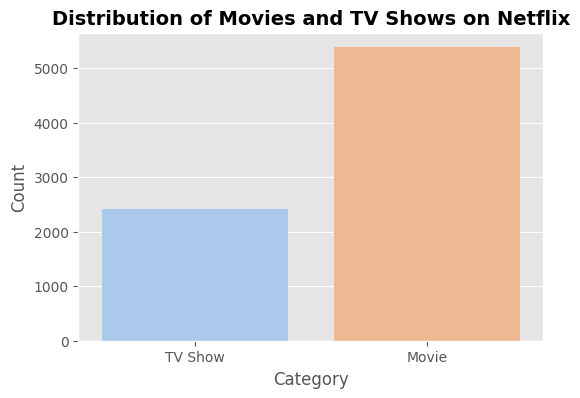

Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
plt.style.use('ggplot')

# Count plot of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', palette='pastel')
plt.title('Distribution of Movies and TV Shows on Netflix', fontsize=14, weight='bold')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Display the actual counts
df['Category'].value_counts()


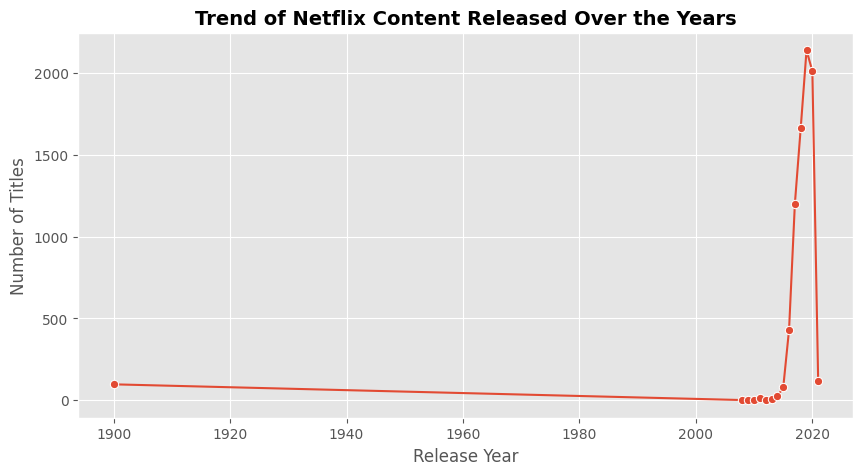

Release_Year
2019.0    2137
2020.0    2009
2018.0    1661
2017.0    1201
2016.0     432
2021.0     117
1900.0      98
2015.0      79
2014.0      24
2011.0      13
Name: count, dtype: int64

In [6]:
# Count how many titles were released each year
content_per_year = df['Release_Year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10,5))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker='o')
plt.title('Trend of Netflix Content Released Over the Years', fontsize=14, weight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

# Display top 10 most active years
content_per_year.sort_values(ascending=False).head(10)


C:\Users\cttha\AppData\Local\Temp\ipykernel_18356\1309669166.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data.values, y=country_data.index, palette='mako')


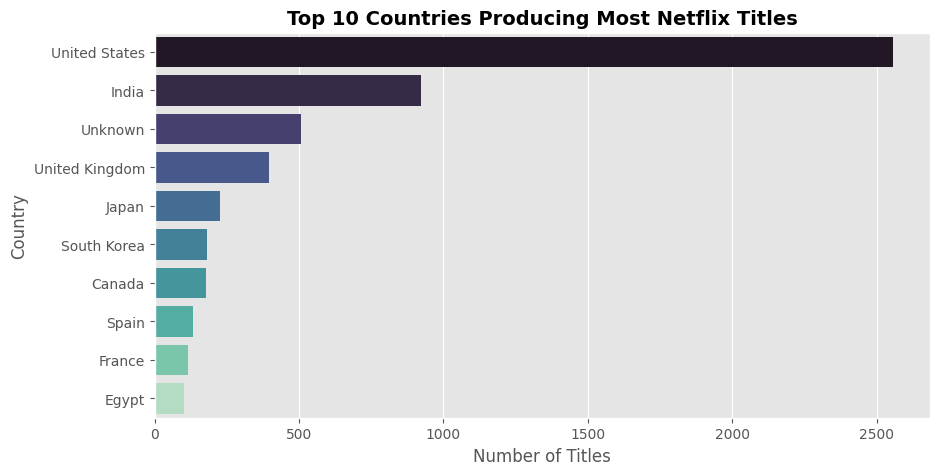

Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: count, dtype: int64

In [7]:
# Count of titles by country (some rows may contain multiple countries)
country_data = df['Country'].value_counts().head(10)

# Plot top 10 countries
plt.figure(figsize=(10,5))
sns.barplot(x=country_data.values, y=country_data.index, palette='mako')
plt.title('Top 10 Countries Producing Most Netflix Titles', fontsize=14, weight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# Display exact numbers
country_data


C:\Users\cttha\AppData\Local\Temp\ipykernel_18356\4207829175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='coolwarm')


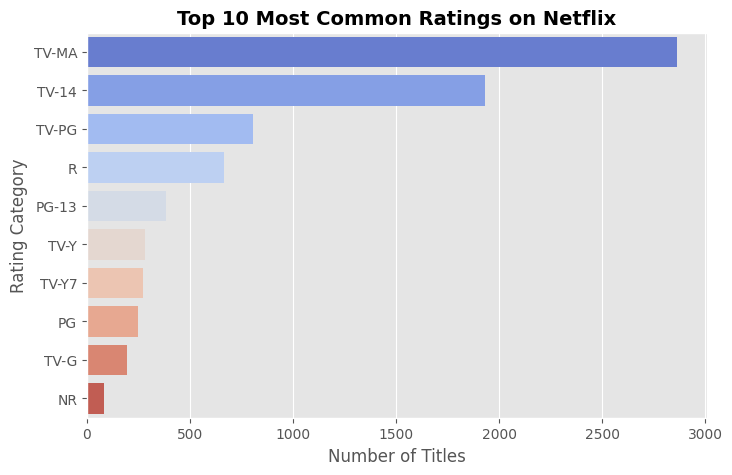

Rating
TV-MA    2865
TV-14    1931
TV-PG     806
R         665
PG-13     386
TV-Y      280
TV-Y7     271
PG        247
TV-G      194
NR         84
Name: count, dtype: int64

In [8]:
# Count of each rating type
rating_counts = df['Rating'].value_counts().head(10)

# Plot top 10 ratings
plt.figure(figsize=(8,5))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='coolwarm')
plt.title('Top 10 Most Common Ratings on Netflix', fontsize=14, weight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Rating Category')
plt.show()

# Display actual counts
rating_counts


C:\Users\cttha\AppData\Local\Temp\ipykernel_18356\3388267144.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')


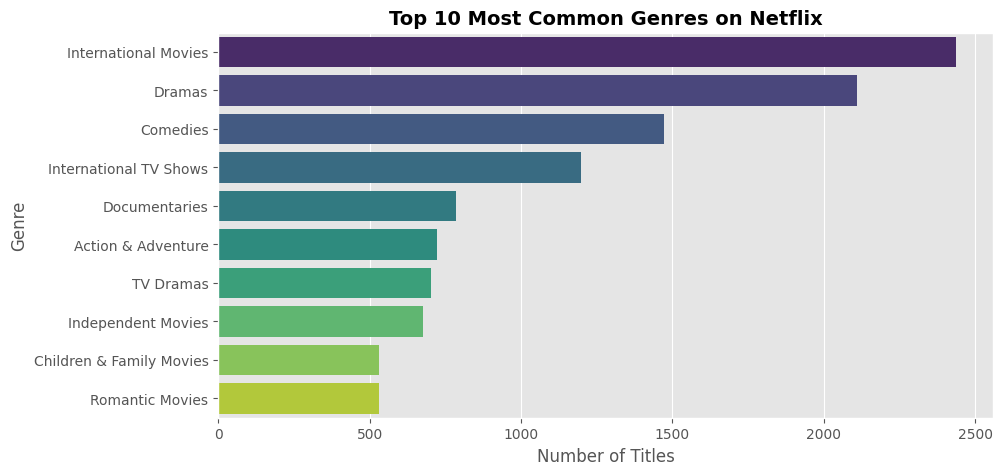

,Genre,Count
0,International Movies,2437
1,Dramas,2108
2,Comedies,1472
3,International TV Shows,1199
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,704
7,Independent Movies,675
8,Children & Family Movies,532
9,Romantic Movies,531


In [9]:
# Split 'Type' column into individual genres (some have multiple separated by commas)
from collections import Counter

# Combine all genres into one list
genres = df['Type'].dropna().apply(lambda x: x.split(',')).sum()

# Count most common genres
genre_counts = Counter([g.strip() for g in genres]).most_common(10)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

# Plot top 10 genres
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix', fontsize=14, weight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

# Display actual data
genre_df


C:\Users\cttha\AppData\Local\Temp\ipykernel_18356\970846978.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Director', data=director_df, palette='crest')
C:\Users\cttha\AppData\Local\Temp\ipykernel_18356\970846978.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Actor', data=actor_df, palette='flare')


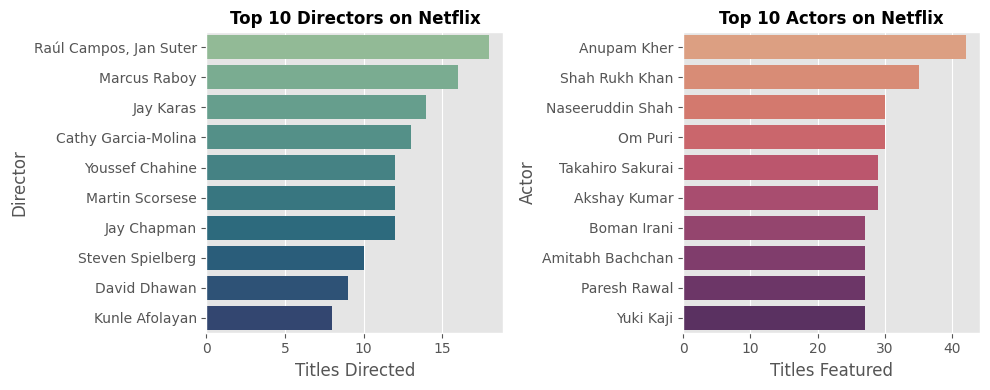

(                 Director  Count
 0  Raúl Campos, Jan Suter     18
 1            Marcus Raboy     16
 2               Jay Karas     14
 3     Cathy Garcia-Molina     13
 4         Youssef Chahine     12
 5         Martin Scorsese     12
 6             Jay Chapman     12
 7        Steven Spielberg     10
 8            David Dhawan      9
 9          Kunle Afolayan      8,
               Actor  Count
 0       Anupam Kher     42
 1    Shah Rukh Khan     35
 2  Naseeruddin Shah     30
 3           Om Puri     30
 4  Takahiro Sakurai     29
 5      Akshay Kumar     29
 6       Boman Irani     27
 7  Amitabh Bachchan     27
 8      Paresh Rawal     27
 9         Yuki Kaji     27)

In [10]:
from collections import Counter

# ---------- TOP DIRECTORS ----------
directors = df['Director'].dropna().tolist()
directors = [d.strip() for d in directors if d != 'Unknown']
director_counts = Counter(directors).most_common(10)
director_df = pd.DataFrame(director_counts, columns=['Director', 'Count'])

# ---------- TOP ACTORS ----------
actors = df['Cast'].dropna().apply(lambda x: x.split(',')).sum()
actors = [a.strip() for a in actors if a != 'Unknown']
actor_counts = Counter(actors).most_common(10)
actor_df = pd.DataFrame(actor_counts, columns=['Actor', 'Count'])

# ---------- VISUALIZATION ----------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x='Count', y='Director', data=director_df, palette='crest')
plt.title('Top 10 Directors on Netflix', fontsize=12, weight='bold')
plt.xlabel('Titles Directed')
plt.ylabel('Director')

plt.subplot(1,2,2)
sns.barplot(x='Count', y='Actor', data=actor_df, palette='flare')
plt.title('Top 10 Actors on Netflix', fontsize=12, weight='bold')
plt.xlabel('Titles Featured')
plt.ylabel('Actor')

plt.tight_layout()
plt.show()

# Display both tables
director_df, actor_df


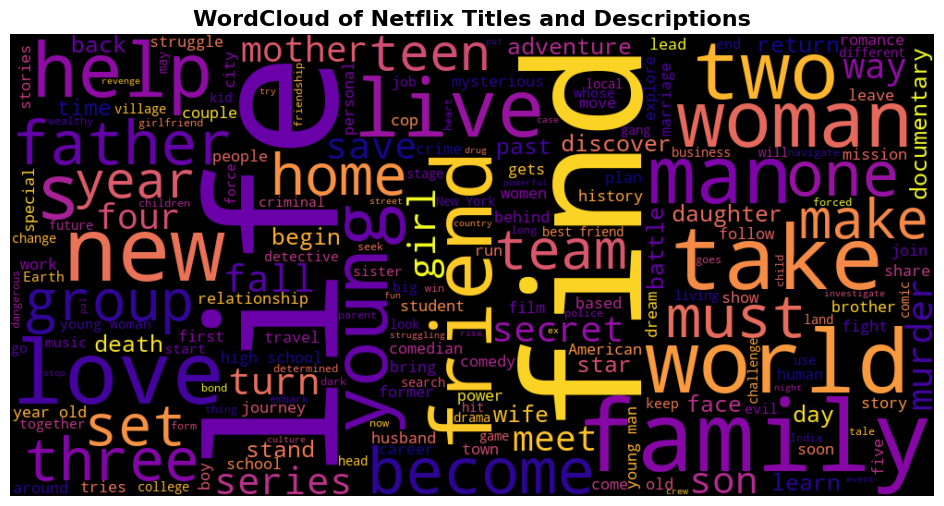

In [11]:
from wordcloud import WordCloud, STOPWORDS

# Combine all descriptions into one string
text = " ".join(desc for desc in df['Description'].astype(str))

# Create and customize the WordCloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='black',
    stopwords=STOPWORDS,
    colormap='plasma',
    min_font_size=10
).generate(text)

# Display the WordCloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Netflix Titles and Descriptions', fontsize=16, weight='bold')
plt.show()
